[12345 54321 43215]
  Transaction time
0         09:45:00
1         09:55:00
2         09:30:00
3         13:00:00
4         14:30:00
5         17:15:00
6         17:35:00
7         17:25:00
8         17:47:00
9         17:55:00


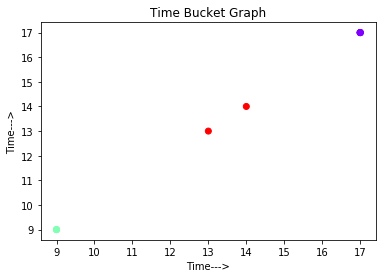

   Transaction time
10         19:05:00
11         19:19:00
12         19:27:00
13         19:47:00
14         10:30:00
15         10:49:00
16         11:05:00
17         15:17:00
18         14:47:00
19         15:27:00


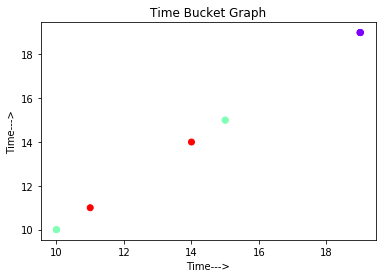

   Transaction time
20         18:07:00
21         18:15:00
22         18:27:00
23         18:47:00
24         19:05:00
25         19:12:00
26         19:50:00
27         19:59:00
28         09:30:00
29         09:55:00
30         12:30:00
31         13:00:00


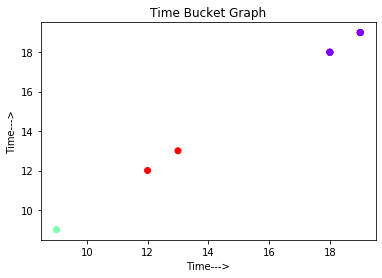

the time buckets for each account are:
[{'Account': 12345, 'Frequent': [17], 'Moderate': [9], 'Least': [13, 14], 'NT Timing': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 15, 16, 18, 19, 20, 21, 22, 23]}, {'Account': 54321, 'Frequent': [19], 'Moderate': [10, 15], 'Least': [11, 14], 'NT Timing': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 16, 17, 18, 20, 21, 22, 23]}, {'Account': 43215, 'Frequent': [18, 19], 'Moderate': [9], 'Least': [12, 13], 'NT Timing': [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 14, 15, 16, 17, 20, 21, 22, 23]}]


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import csv
transact=pd.read_csv("H:/analysis/transaction_details.csv", delimiter=';')
transact=transact[['Account No.', 'Transaction time']]
Account= transact['Account No.'].unique()

def t_bucket(df,a):
    timeframe=pd.Series(np.zeros((24,), dtype=int))
    y=[]
    for i in df['Transaction time']:
        i = datetime.strptime(i, '%H:%M:%S')
        i=int(i.strftime('%H'))
        y.append(i)
        timeframe.iloc[i]+=1
    maximum=int(timeframe.max())
    frequent=list(timeframe[timeframe == maximum].index)
    minimum = int(timeframe[timeframe > 0].min())
    least = list(timeframe[timeframe == minimum].index)
    NT_timing = list(timeframe[timeframe == 0].index)
    mod=[i for i in timeframe if (i != maximum and i != minimum and i !=0)]
    moderate=list(timeframe[timeframe.isin(mod)].index)
    x=[]
    for i in y:
        if i in frequent:
            x.append(0)
        elif i in least:
            x.append(2)
        elif i in NT_timing:
            x.append(3)
        else:
            x.append(1)
    plt.scatter(x=y, y=y,c= x, cmap='rainbow')
    plt.xlabel('Time--->')
    plt.ylabel('Time--->')
    plt.title('Time Bucket Graph')
    plt.show()
    ######################################################
    temp={'Account': a, 'Frequent': frequent, 'Moderate': moderate, 'Least': least, 'NT Timing': NT_timing}
    
    #output will be saved in a csv file.
    dict=str(a)+ ".csv"
    w = csv.writer(open(dict, "w"))
    for key, val in temp.items():
        w.writerow([key, val])
    ###################################
    return frequent, moderate, least, NT_timing,temp




timebucket=[]
print(Account)
for x in Account:
    temp=pd.DataFrame(transact['Transaction time'].where(transact['Account No.']==x).dropna())
    print(temp)
    frequent, moderate, least, NT_Timing, dict =t_bucket(temp,x)
    timebucket.append(dict)



print("the time buckets for each account are:")
print(timebucket)

